# Fundamentals of Machine Learning

The goal of this notebook is to make you familiar with the fundamental aspects of Machine Learning in a hands-on manner, in complement to the material already covered during the lecture. To this end, a prototypical regression and classification dataset will be considered. First and foremost however, some relevant Python packages will be discussed below.

# Relevant packages

### Scikit-learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. It is the most user-friendly and gentle package to get started with machine learning. You can browse the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and [tutorials](https://scikit-learn.org/stable/tutorial/index.html) for additional details.

### Essential Libraries and Tools
Scikit-learn depends on two other Python packages, NumPy and SciPy. For plotting and interactive development, you should also install matplotlib, IPython, and the Jupyter Notebook.
- **NumPy** is one of the fundamental packages for scientific computing in Python. In scikit-learn, the NumPy array is the fundamental data structure. Any data you’re using will have to be converted to a NumPy array.
- **SciPy** is a collection of functions for scientific computing in Python. Scikit-learn draws from SciPy’s collection of functions for implementing its algorithms.
- **Matplotlib** is the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots, and so on.
- **Pandas** Python library for data wrangling and analysis. It can ingest from a great variety of file formats and databases, like SQL, Excel files, and comma-separated values (CSV) files.

### XGBoost
XGBoost (eXtreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. You can also browse the [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/) for additional details.

### DeepChem
DeepChem is a high quality open-source toolchain that democratizes the use of deep-learning in chemistry, biology and materials science. It also provides various tools for dataset loader, splitters, molecular featurization, model construction and hyperparameter tuning. You can also browse the [DeepChem Ducumentation](https://deepchem.readthedocs.io/en/latest/) for additional details.

We will first install the required libraries. We also need `RDKit` library to process and analyze molecules, like calculating molecular descriptors.

In [7]:
# Install all libraries
!pip install numpy scipy matplotlib scikit-learn pandas rdkit xgboost deepchem mordred pycm

# Download all data
!mkdir data
!curl https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/esol.csv -o data/esol.csv
!curl https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/02%20-%20Supervised%20Learning/data/toxcast_data.csv -o data/toxcast_data.csv
!curl https://drive.switch.ch/index.php/s/3WJTVB7xHG8ZOhD/download -o data/features_tox.npy
!curl https://drive.switch.ch/index.php/s/lFN8myikJekptjk/download -o data/y_tox.npy

mkdir: data: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34453  100 34453    0     0   726k      0 --:--:-- --:--:-- --:--:--  782k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9.8M  100  9.8M    0     0  45.3M      0 --:--:-- --:--:-- --:--:-- 46.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 97.6M  100 97.6M    0     0  29.0M      0  0:00:03  0:00:03 --:--:-- 29.1M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63584  100 63584    0     0   176k      0 --:--:-- --:--:-- --:--:--  177k


# Supervised learning
As discussed during the lecture, two major types of supervised machine learning problems:
- **Classification**, where the task task is to predict a class label (e.g. what color, what smell, state of aggregation, etc).
- **Regression**, where the task is to predict a real number (e.g. solubility in water, yield, selectivity, etc).

## Examples of Common Algorithms
- k-Nearest Neighbors (k-NN)
- Linear Models
- Support Vector Machines (SVM)
- Decision Trees
- Ensembles of Decision Trees
  - Random forests
  - Gradient boosting machines

Each of the these algorithms are implemented as a class in [scikit-learn](https://scikit-learn.org/stable/index.html), which means that they can be readily imported once this package is installed.

In [6]:
# linear regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

### Exercise: Similarly to the linear regression model above, create a [k-NN regression model](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) using scikit-learn.

In [8]:
### YOUR CODE

# import
from sklearn.neighbors import KNeighborsRegressor

# create knn model
knn_clf = KNeighborsRegressor()

### END

## 1.2 Model evaluation and data splitting

### Quick recap: Why do we need to split the dataset?

We want models to learn patterns from data. Primarily, we want to know how good our models perform when they see new example data points for which we do not know the label/target. To simulate this situation, we hold-out some part of our dataset for `testing`: we keep it separate to evaluate how the model would actually do in the real world, with data it hasn't seen before.

In addition, typically we implement multiple models and select the best one, but how to assess which one is the best, without revealing the `test set`? Well, take another subset of the data, and this one we call `validation` set.

In the end, we end up splitting our data into `training` (used for training the models), `validation` (for selecting the models), and `test` (for testing the resulting models). If you have more time, you can read [this article](https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c) for more details.

### Evaluation metrics
The metrics used to evaluate the ML models are very important. The choice of metrics to use influences how model performance is measured and compared. The main evaluation metrics for regression and classification tasks are illustrated below. If you have more time, you can read this [article](https://blog.knoldus.com/model-evaluation-metrics-for-machine-learning-algorithms/) for more details.

<div align="center">
<img src="https://www.oreilly.com/api/v2/epubs/9781492073048/files/assets/mlbf_0407.png" width="500"/>
</div>

## The path to a ML model.
0. Define the task
1. Prepare data & split data
2. Choose the model
3. Train the model
4. Evaluate the model
5. Use the model

# Regression

**Aqueous solubility is one of the key physical properties of interest to a medicinal or agrochemical chemist**. Solubility affects the uptake/distribution of biologically active compounds in living material and the environment, thus affecting their potential efficacy. However, solubility determination is a time-consuming experiment, and it is useful to be able to assess solubility in the absence of a physical sample (so that you can know whether it is worth it to synthesize the compound).

Our goal here will be to build a ML model that can predict **aqueous solubility** of organic molecules based on a simple SMILES input.

### We will use the [ESOL dataset](https://pubs.acs.org/doi/10.1021/ci034243x) for this task.
This dataset contains structures and water solubility data for 1128 compounds.

### Load dataset

In [9]:
import pandas as pd

# load dataset from the CSV file
esol_df = pd.read_csv('data/esol.csv')
esol_df.sample(5)

,smiles,log solubility (mol/L)
253,CCOC(=O)N,0.850
882,C=CCC=C,-2.090
1037,c1c(O)C2C(=O)C3cc(O)ccC3OC2cc1(OC),-2.943
552,CC23Cc1cnoc1C=C2CCC4C3CCC5(C)C4CCC5(O)C#C,-5.507
921,CCCC(O)C=C,-0.590


The original dataset contains 2 columns, the `smiles` column, which encodes the molecular structure, and the `log solubility (mol/l)` columns represents aqueous solubility of molecules, which is the our target for this task.

In [10]:
# Get NumPy arrays from DataFrame for the input and target
smiles = esol_df['smiles'].values
y = esol_df['log solubility (mol/L)'].values

### Molecular descriptor calculation
We need to convert the SMILES strings of molecules into numerical values that can be used as input to the ML models. Many molecular descriptors can be calculated from SMILES strings using software like `RDKit`, `DeepChem` and [Mordred](https://github.com/mordred-descriptor/mordred).\
For this task we will use [DeepChem featurizers](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html) to compute molecular descriptors.

In [11]:
# Here, we use molecular descriptors from RDKit, like molecular weight, number of valence electrons, maximum and minimum partial charge, etc.
from deepchem.feat import RDKitDescriptors
featurizer = RDKitDescriptors()
features = featurizer.featurize(smiles)
print(f"Number of generated molecular descriptors: {features.shape[1]}")

# Drop the features containing invalid values
import numpy as np
features = features[:, ~np.isnan(features).any(axis=0)]
print(f"Number of molecular descriptors without invalid values: {features.shape[1]}")

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (/opt/anaconda3/envs/bayesian/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/opt/anaconda3/envs/bayesian/lib/python3.10/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
[12:19:05] DEPRECATION WARNING: please use MorganGenerator
[12:19:05] DEPRECATION WARNING: please use Mor

Number of generated molecular descriptors: 210
Number of molecular descriptors without invalid values: 210


[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerator
[12:19:17] DEPRECATION WARNING: please use MorganGenerat

**Exercise**: You can try to use [MACCSKeysFingerprint](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html#maccskeysfingerprint) in [DeepChem featurizers](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html) to compute molecular descriptors.

In [13]:
### YOUR CODE

# import the featurizer
from deepchem.feat import MACCSKeysFingerprint

# create featurizer
mf_featurizer = MACCSKeysFingerprint()

# compute molecular descriptors
mf_features = featurizer.featurize(smiles)

[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerator
[12:21:08] DEPRECATION WARNING: please use MorganGenerat

### Feature Selection

Feature selection is a crucial step in machine learning that involves selecting the most relevant features (or variables) from a dataset. This process helps to improve the accuracy and efficiency of a model by reducing the amount of noise and redundancy in the data. Essentially, feature selection allows us to focus on the most important information in the dataset, while ignoring the irrelevant or redundant information.

Many classes and functions in the [sklearn.feature_selection](https://scikit-learn.org/stable/modules/feature_selection.html) module can be used for feature selection.\
Here we show a simple feature selection using `VarianceThreshold` in `scikt-learn`.

In [14]:
# Here, we removed all zero-variance features, i.e. features that have the same value in all samples.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
features = selector.fit_transform(features)
print(f"Number of molecular descriptors after removing zero-variance features: {features.shape[1]}")

Number of molecular descriptors after removing zero-variance features: 191


### Dataset split

In [15]:
from sklearn.model_selection import train_test_split
X = features
# training data size : test data size = 0.8 : 0.2
# fixed seed using the random_state parameter, so it always has the same split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0)

### Data preprocessing

As it turns out, different features have different scales and distributions.\
Think of molecular weight, which goes from **0 to around 1000 AMU for small organic molecules**, and electrochemical potential, [typically between -3 and 3](https://par.nsf.gov/servlets/purl/10016877). These differences have a huge impact on ML models, which is the reason why we will typically normalize all the features.

Many classes and functions in the [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) module can be used for preprocessing data. Here we show a simple Min-Max normalization of features using `MinMaxScaler` in `scikt-learn`.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# save original X
X_train_ori = X_train
X_test_ori = X_test
# transform data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Q: Is there a difference between doing data preprocessing before and after data split? Which one is better and why?

### Create models

In [17]:
# random forest regressor, and the default criterion is mean squared error (MSE)
from sklearn.ensemble import RandomForestRegressor
ranf_reg = RandomForestRegressor(n_estimators=10, random_state=0)  # using 10 trees and seed=0

# XGBoost regressor
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=10, random_state=0)  # using 10 trees and seed=0

### Train and evaluate the models
- Mean Squared Error: $MSE$ = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$
- Root Mean Squared Error: $RMSE$ = $\sqrt{MSE}$ = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2}$

We choose `RMSE` as the evaluation metric for this task.

In [18]:
from sklearn.metrics import mean_squared_error

def train_test_model(model, X_train, y_train, X_test, y_test):
    """
    Function that trains a model, and tests it.
    Inputs: sklearn model, train_data, test_data
    """
    # Train model
    model.fit(X_train, y_train)

    # Calculate RMSE on training
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_train_mse = mean_squared_error(y_train, y_pred_train)
    model_test_mse = mean_squared_error(y_test, y_pred_test)
    model_train_rmse = model_train_mse ** 0.5
    model_test_rmse = model_test_mse ** 0.5
    print(f"RMSE on train set: {model_train_rmse:.3f}, and test set: {model_test_rmse:.3f}.\n")


# Train and test the random forest model
print("Evaluating Random Forest Model.")
train_test_model(ranf_reg, X_train, y_train, X_test, y_test)

# Train and test XGBoost model
print("Evaluating XGBoost model.")
train_test_model(xgb_reg, X_train, y_train, X_test, y_test)

Evaluating Random Forest Model.
RMSE on train set: 0.290, and test set: 0.736.

Evaluating XGBoost model.
RMSE on train set: 0.276, and test set: 0.735.



### Q: Compare the results. Which model is better in this case?

**Exercise**: Try to train a [SVM model](https://scikit-learn.org/stable/modules/svm.html#regression) and evaluate it. You can create a [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) model using default parameters.

In [19]:
### YOUR CODE

# import
from sklearn import svm

# create a model
svm_reg = svm.SVR()

# train and evaluate the model
train_test_model(svm_reg, X_train, y_train, X_test, y_test)

### END

RMSE on train set: 0.520, and test set: 0.730.



Perfect! Now you have mastered training and evaluating the model you want.

## Cross-validation and hyperparamter optimization

Our last topic in this section is hyperparameter optimization.

As you've seen, models need some parameters as input, and we need to decide which are the best parameters (e.g. `n_estimators` in tree-based models). Many classes and functions in the [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) module can be used for cross validation and hyperparamter optimization.\
Here, we use cross validation and grid search methods to optimize the paramters of random forest model. In cross-validation, the original training data is further split into training and validation sets.

The class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) does all the work for us, combining cross-validation with grid search, so we can very easily optimize the hyperparameters.

<div align="center">
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="400"/>
</div>


<font size=5 color="red">
Note that when you call grid_search.fit(), you only pass the training data as argument.
</font>
Why?

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 20, 30]
}

# use 5-folds cross validation during grid searching
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid,
    cv=5
)
grid_search.fit(X_train, y_train)

# re-train a model using best hyperparameters
rf_gs = RandomForestRegressor(**grid_search.best_params_, random_state=0)

print('Best paramters: ', grid_search.best_params_)
print('Random forests performance after hyperparamter optimization:')
train_test_model(rf_gs, X_train, y_train, X_test, y_test)

Best paramters:  {'max_depth': 20, 'n_estimators': 50}
Random forests performance after hyperparamter optimization:
RMSE on train set: 0.247, and test set: 0.693.



### Exercise: Compare the train and test RMSE of Random Forest models (`ranf_reg` and `rf_gs`). Which one is better? Argument.

---

# Classification

We now turn our attention towards the other type of supervised learning: classification.

Many questions in chemistry can be framed as a classification task:

- Will this molecule act as a nucleophile or electrophile in my reaction?
- What is the smell of this substance? (fruity, citrus, sweet, ...)

Here, we will focus on whether a molecule is toxic or not.


---

## For this, we need data. [MoleculeNet](https://moleculenet.org/datasets-1) provides several datasets, and we'll work with `ToxCast` for prediction of toxicity.

ToxCast is a dataset containing `toxicology data for a large library of compounds based on in vitro high-throughput screening, including experiments on over 600 tasks`.

Let's see if one of our models can tell what molecules are toxic!

This is super useful for instance in drug discovery, where we want to know if a molecule has potential as a drug, **even before we synthesize it**.

The steps we follow are similar to those we saw for regression:

1. Prepare & split data
2. Choose a model
3. Train the model
4. Evaluate the model
5. Use the model

In [21]:
import pandas as pd

# Load clintox data from the data directory and see what it contains
df_toxicity = pd.read_csv("data/toxcast_data.csv")
df_toxicity.head(3)

,smiles,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,[O-][N+](=O)C1=CC=C(Cl)C=C1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CN1CCN(CC1)C(=O)C1CCCCC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset contains the molecule SMILES, plus a lot of data coming from different [toxicity measurements](https://www.epa.gov/chemical-research/exploring-toxcast-data).

We will stick to `TOX21_TR_LUC_GH3_Antagonist`, as is the one for which we have more data.

In [22]:
df_tox = df_toxicity.loc[:,["smiles","TOX21_TR_LUC_GH3_Antagonist"]].dropna()
df_tox.columns = ["smiles", "toxic"]
df_tox.sample(5)

,smiles,toxic
6809,CC=CC=NNC(=O)C1=CC=NC=C1,0.0
5818,CC(C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@]1(C)CCC2=C...,0.0
4960,OS(O)(=O)=O.OS(O)(=O)=O.NCC[C@H](O)C(=O)N[C@@H...,0.0
3199,[Br-].CCCCCCCCCC[N+](C)(C)CCCCCCCCCC,1.0
662,Cl.CCOC(=O)[C@H](CCC1=CC=CC=C1)N[C@H]1CS[C@@H]...,0.0


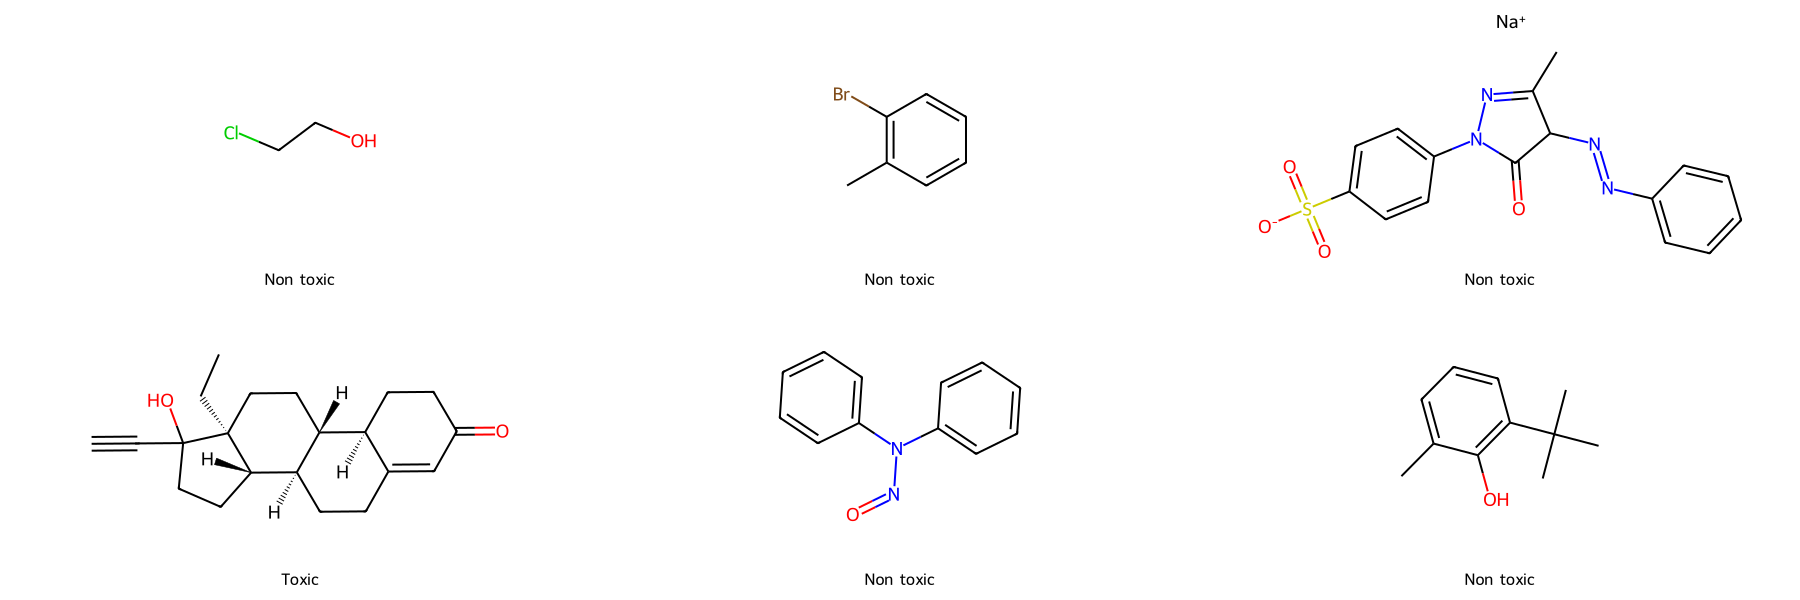

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw

# Visualize some of the molecules of this dataset
n=6
df_sample=df_tox.sample(n)

smiles = df_sample.smiles.values
legend = df_sample.toxic.values
molecs = [Chem.MolFromSmiles(s) for s in smiles]

Draw.MolsToGridImage(
    molecs,
    subImgSize=(600,300),
    legends=["Toxic" if i==1 else "Non toxic" for i in legend]
)

In [24]:
# How many toxic molecules are in the dataset?
counts = df_tox["toxic"].value_counts()

print(f"The dataset contains {counts.sum()} molecules; {counts.iloc[1]} of them are toxic.")

The dataset contains 7950 molecules; 1764 of them are toxic.


## Now, we will calculate some molecular descriptors using the [mordred package](http://mordred-descriptor.github.io/documentation/master/descriptors.html).

In [25]:
from rdkit import Chem
import numpy as np
from deepchem.feat import MordredDescriptors

featurizer = MordredDescriptors(ignore_3D=True)
features = featurizer.featurize("CCC")
print("Number of molecular descriptors:", features.shape[1])

Number of molecular descriptors: 1613


This can take a while (at least 40 minutes), you can use this time to explore a bit the more than 1600 descriptors from mordred!

In [26]:
X_raw = df_tox.smiles.apply(lambda x: featurizer.featurize(x))
y_raw = df_tox.toxic

# As you see from the warnings, mordred couldn't calculate features for a few molecules (but don't worry!)
# Remove these molecules from the dataset

# Featurizer should return array of size (1, number_of_features)
missing = X_raw.apply(lambda x: x.shape == (1, features.shape[1]))

print(f"Dropping {(~missing).sum()} molecules that couldn't be featurized.")
X = X_raw[missing].values
y = y_raw[missing].values

X = np.concatenate(X)

# Save
np.save("data/features_tox.npy", X)
np.save("data/y_tox.npy", y)

/opt/anaconda3/envs/bayesian/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
[12:34:59] Explicit valence for atom # 0 F, 2, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True, bool includeAtomMaps=True)
[12:43:29] Explicit valence for atom # 2 Cl, 2, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True, bool includeAtomMaps

Dropping 18 molecules that couldn't be featurized.


In [27]:
X = np.load("data/features_tox.npy")
y = np.load("data/y_tox.npy")

In [54]:
# Challenge: Which molecules couldn't be featurized? Why?
# Using code from above, visualize the faulty molecules.

print(df_tox[~missing])

                                            smiles  toxic
1039     [F-][B+3]([F-])([F-])[F-].CC[N+]1(C)CCCC1    0.0
1789  [NH4+].[NH4+].[Cl-][Pt++]([Cl-])([Cl-])[Cl-]    0.0
1881              [Cl-][Pt]1([Cl-])[NH2+]CC[NH2+]1    0.0
2456              [Na+].[Na+].F[Si--](F)(F)(F)(F)F    0.0
2463            [NH4+].[NH4+].F[Si--](F)(F)(F)(F)F    0.0
4175                                          FAIL    0.0
4781                                          FAIL    0.0
5098                                          FAIL    0.0
5993                                          FAIL    1.0
6611                                          FAIL    0.0
6625                                          FAIL    0.0
6909                                          FAIL    0.0
7185                                          FAIL    0.0
7338                                          FAIL    1.0
7862                                          FAIL    0.0
7950                                          FAIL    0.0
8047          

## Data splitting.

For this exercise, we will do a simple train/test split as we will not optimize hyperparameters. (Maybe bonus exercise here?)

In [55]:
from sklearn.model_selection import train_test_split

# train data size : test data size = 0.8 : 0.2
# fixed seed using the random_state parameter, so it always has the same split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=0
)

print(f"Train set size is {X_train.shape[0]} rows, test set size is {X_test.shape[0]} rows.")

Train set size is 6345 rows, test set size is 1587 rows.


## Model

Let's train a [Random Forest Classification](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from scikit-learn.

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=0
)
rf_clf.fit(X_train, y_train);

### Exercise: You have already seen some cool classification algorithms in class.

In this exercise, your task is to implement your 2 favorite algorithms using sklearn.

Recommendations:

- You can choose from [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification), [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting), or any other from the [sklearn documentation](https://scikit-learn.org/stable/supervised_learning.html).
- Give a different name to each model. For instance, our Random Forest model is `rf_clf`.

In [83]:
##################
# Your code here #
##################

from sklearn import svm
from sklearn import linear_model

# create a model
svm_class = svm.SVC()

# train and evaluate the model
svm_class.fit(X_train, y_train);

logistic = linear_model.LogisticRegression(max_iter=10000)

logistic.fit(X_train, y_train);

## After training these models, let's see which one worked best!

For the evaluation of classification models, **we use different metrics** than evaluation of regression models. \
You can read more about each metric [here](https://scikit-learn.org/stable/modules/model_evaluation.html), but for this tutorial we will use [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [ROC-AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score), and [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

In [84]:
# Let's evaluate our models
y_pred_rf = rf_clf.predict(X_test)

# Exercise: Use your models to predict the toxicity of the molecules on the test set.

y_pred_svm = svm_class.predict(X_test)
y_logistic = logistic.predict(X_test)

In [85]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score
)

# Let's calculate accuracy_score for all our models
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier is {acc_rf:.3f}")
auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC of Random Forest Classifier is {auc_rf:.3f}")
f1s_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score of Random Forest Classifier is {f1s_rf:.3f}")

# Exercise: Calculate the 3 metrics for every model you trained, and compare results

acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm)
f1s_svm = f1_score(y_test, y_pred_svm)

print(acc_svm, auc_svm, f1s_svm)

acc_logistic = accuracy_score(y_test, y_logistic)
auc_logistic = roc_auc_score(y_test, y_logistic)
f1s_logistic = f1_score(y_test, y_logistic)

print(acc_logistic, auc_logistic, f1s_logistic)

Accuracy of Random Forest Classifier is 0.834
ROC-AUC of Random Forest Classifier is 0.693
F1 Score of Random Forest Classifier is 0.546
0.7693761814744802 0.5 0.0
0.7718966603654694 0.5485123722828641 0.21304347826086956


---
Find out what each metric is telling us. Should we trust such high accuracies? Why is accuracy so high compared to the other metrics?

YOUR ANSWER:

---

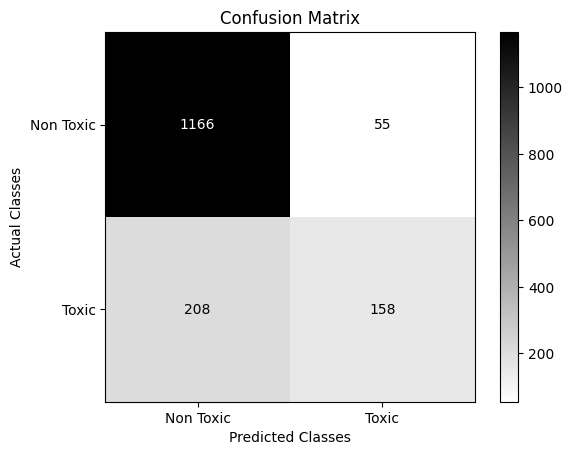

In [88]:
# TODO let's also do confusion matrix
from pycm import ConfusionMatrix

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred_rf)
cm.relabel(mapping={0:"Non Toxic", 1:"Toxic"})
cm.plot(number_label=True);

# So after all what, is my molecule toxic? Let's see what our model says!

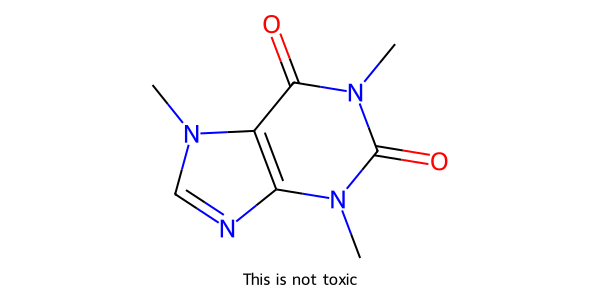

In [90]:
from IPython.display import display

def is_this_toxic(molecule, model):
    """
    Ask model if the input molecule (smiles) is toxic or not.
    """

    mol = Chem.MolFromSmiles(molecule)

    # Calculate features
    X_my_mol = featurizer.featurize(molecule)

    # Get model prediction
    is_toxic = model.predict(X_my_mol)
    is_toxic = "This molecule is toxic!" if is_toxic else "This is not toxic"

    img = Draw.MolsToGridImage(
        [mol],
        subImgSize=(600,300),
        legends=[is_toxic],
        molsPerRow=1
    )
    display(img)

# Define molecule here
molecule = "O=C1N(C)C(C2=C(N=CN2C)N1C)=O"
is_this_toxic(molecule, model=rf_clf)


# Exercise: Test with your own molecule!

---

## Should I trust this though?: Interpretability and explainability.

> Cool, our models know stuff, but we also want to know! \
> What do they look at when they predict toxicity? Is there a key feature?

\
Model explainability is a critical component of machine learning that seeks to provide insights into how a model arrives at its predictions or decisions. In other words, it aims to make the "black box" of machine learning models more transparent, so that we can understand the factors that are driving the model's output.

There are many different methods for achieving model explainability (more on this [here](https://www.kaggle.com/learn/machine-learning-explainability)). \
These techniques can help us identify which features or variables are most important in driving the model's output, and can provide insights into the model's decision-making process.

### Let's explore ways of measuring feature importance, which will tell us what our models are looking out when making predictions.

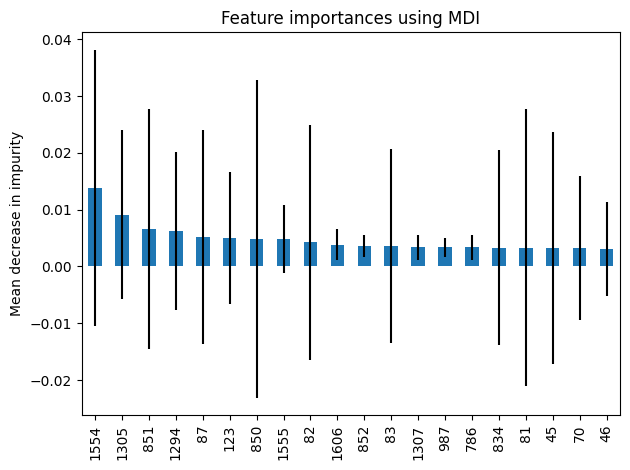

In [91]:
importances = pd.Series(rf_clf.feature_importances_, name="importance")
importances.index += 1
std = pd.Series(np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0),
                name="std")

importances = pd.concat([importances, std], axis=1)
importances = importances.sort_values(by="importance", ascending=False).iloc[:20]


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
importances["importance"].plot.bar(yerr=importances["std"], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

---
What can we learn from these results? \
Go to [Mordred documentation](http://mordred-descriptor.github.io/documentation/master/descriptors.html) and find these features. What are they, and do they make any sense?

### Discuss

---